In [275]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch

from sbi.inference import NPE
from sbi.analysis import pairplot
from sbi.utils import BoxUniform

In [276]:
num_dim = 3

In [277]:
def create_t_x(theta):
    ts = 5
    dt = 0.001
    N = int(ts/dt)
    t = np.linspace(0, ts, N)
    xk = np.array((0.5,4))
    x = []

    for k in range(N): 
        xk = xk + np.array([
            (0, dt), 
            (-theta[1]*dt/theta[0], -theta[2]*dt/theta[0])
        ]) @ xk + np.array((0, dt/theta[0])) * np.cos(k*dt * 10)
        x.append(xk)

    # tx = np.column_stack((t, np.array(x)))
    return t, np.array(x)

def eval(t, x, val):
    index = np.argmin(np.abs(t - val))
    return x[index]


In [278]:
theta_o = np.array((10,5,2))
t, x = create_t_x(theta_o)

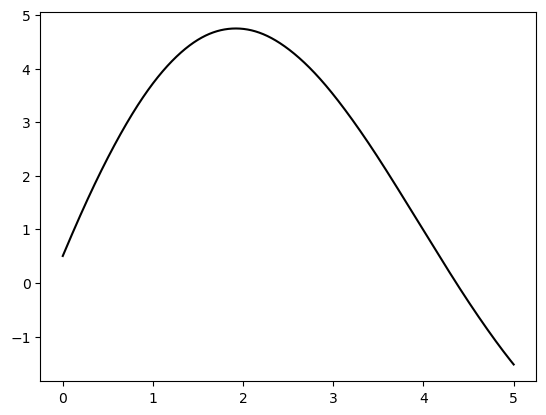

In [279]:
plt.plot(t, x[:, 0], "k")

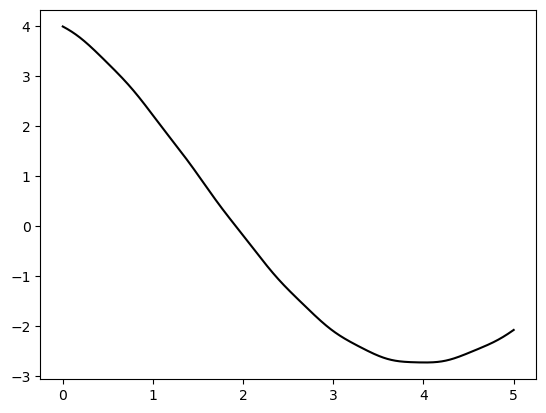

In [280]:
plt.plot(t, x[:, 1], "k")

In [283]:
def get_3_values(t, x):
    """
    Return 3 'x' values corresponding to t=-0.5,0,0.75 as summary statistic vector
    """
    return np.array(
        [
            eval(t, x, 0.5),
            eval(t, x, 2.5),
            eval(t, x, 4.75),
        ]
    )

In [299]:
theta = prior.sample((1000,))
theta = torch.as_tensor(theta, dtype=torch.float32)
prior_min = [-10, -5, -2]
prior_max = [10, 5, 2]
prior = BoxUniform(
    low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max)
)

In [300]:
vals = get_3_values(t, x)
vals = torch.as_tensor(x, dtype=torch.float32)

In [301]:
inference = NPE(prior)
_ = inference.append_simulations(theta, vals).train()
posterior = inference.build_posterior()

AssertionError: Number of parameter sets (=1000 must match the number of simulation outputs (=5000)

In [293]:
x_o = torch.as_tensor(get_3_values(t, x), dtype=float)

In [295]:
theta_p = posterior.sample((10000,), x=x_o)

fig, axes = pairplot(
    theta_p,
    limits=list(zip(prior_min, prior_max)),
    ticks=list(zip(prior_min, prior_max)),
    figsize=(7, 7),
    labels=["a", "b", "c"],
    fig_kwargs=dict(
        points_offdiag={"markersize": 6},
        points_colors="r",
    ),
    points=theta_o,
);

NameError: name 'posterior' is not defined